In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("Train.csv")
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above output cell
### Information 1
    1. The difference between 75% and max value in Item_Outlet_Sales column is very high. It says that there is presence of outliers in that column.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

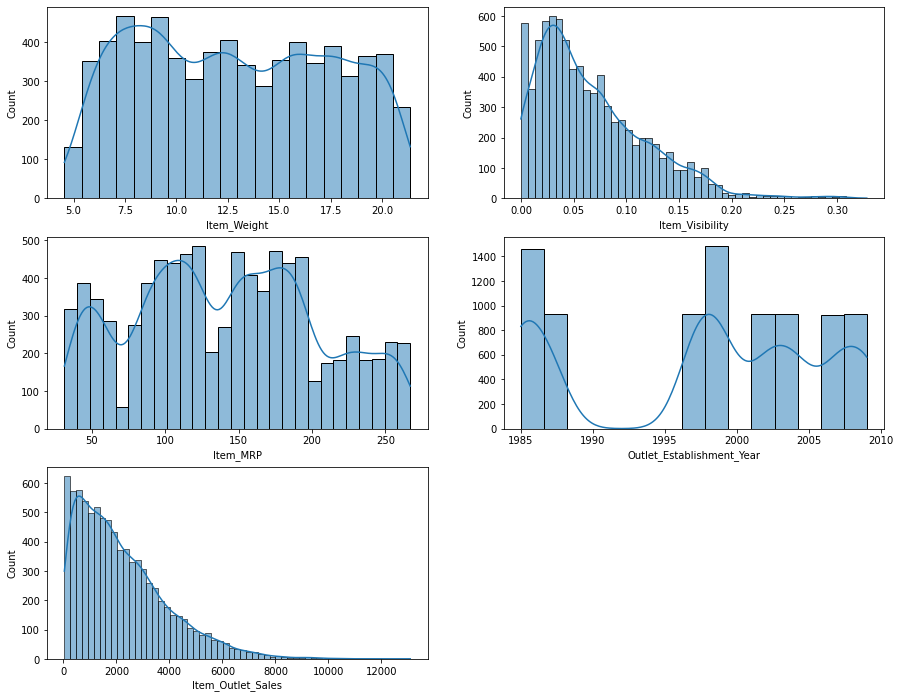

In [5]:
plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.histplot(df.Item_Weight, kde=True)

plt.subplot(3,2,2)
sns.histplot(df.Item_Visibility, kde=True)

plt.subplot(3,2,3)
sns.histplot(df.Item_MRP, kde=True)

plt.subplot(3,2,4)
sns.histplot(df.Outlet_Establishment_Year, kde=True)

plt.subplot(3,2,5)
sns.histplot(df.Item_Outlet_Sales, kde=True)

 the above output cell
### Information 2
    1. No data is normally distriuted
    2. Item_Visibility and Item_Outlet_Sales columns are right skewed i.e. positive skewness. We can apply some transformation techniques to make the data normally distributed

<AxesSubplot:xlabel='Item_Outlet_Sales'>

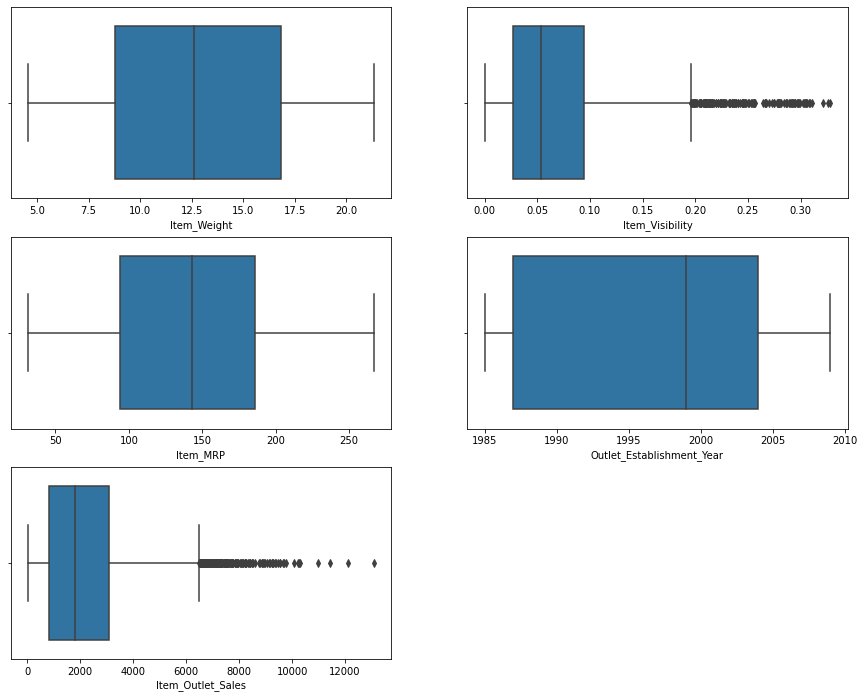

In [6]:
plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.boxplot(x="Item_Weight", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Item_Visibility", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Item_MRP", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Outlet_Establishment_Year", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Item_Outlet_Sales", data=df)

From the above output cell
### Information 3
    1. Item_Visbility & Item_Outlet_Sales column contains outliers

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

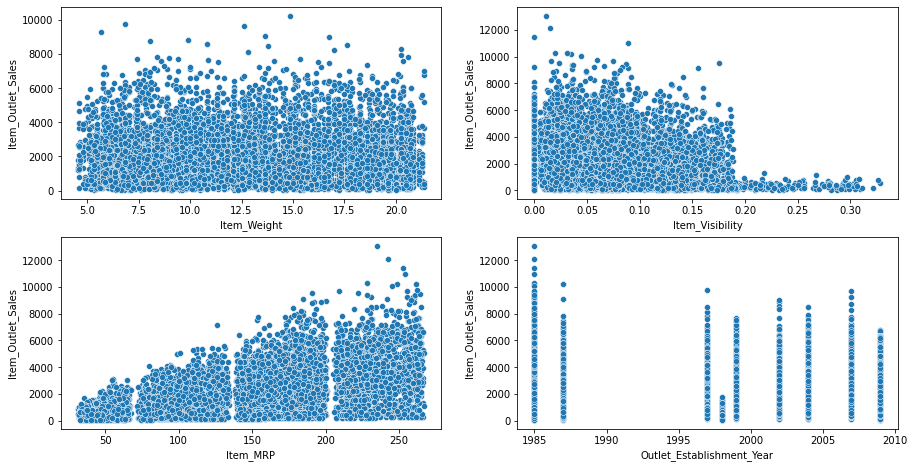

In [7]:
plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data=df)

plt.subplot(3,2,2)
sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df)

plt.subplot(3,2,3)
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", data=df)

plt.subplot(3,2,4)
sns.scatterplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=df)

From the above output cell
### Information 4
    1. Item_Visbility not directly proportional to Item_Outlet_Sales.
    2. Item_MRP is directly proportional to Item_Outlet_Sales. But not in linear fasion.
    3. There is some small drop in Item_Outlet_Sales when compared with Outlet_Establishment_Year

In [8]:
# removing spelling error in variables
itemFatContent = {'low fat': "Low Fat", 'LF': "Low Fat", 'reg': "Regular"}
df.Item_Fat_Content.replace(itemFatContent, inplace=True)

### Item_Outlet_Sales vs Item_Type

In [9]:
df.pivot_table(values="Item_Outlet_Sales", index="Item_Type", aggfunc="sum").round(3).sort_values(by=['Item_Outlet_Sales'], ascending=False)

,Item_Outlet_Sales
Item_Type,
Fruits and Vegetables,2820059.817
Snack Foods,2732786.087
Household,2055493.713
Frozen Foods,1825734.789
Dairy,1522594.051
Canned,1444151.493
Baking Goods,1265525.342
Health and Hygiene,1045200.138
Meat,917565.612


From the above output cell
### Information 5
    1. Fruits & Vegetables and Snack Foods are top sold products
    2. Buyers doesn't prefer Seafood

### Item_Outlet_Sales vs Item_Fat_Content

In [10]:
df.pivot_table(values="Item_Outlet_Sales", index="Item_Fat_Content", aggfunc="sum").round(2).sort_values(by=['Item_Outlet_Sales'], ascending=False)

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,11904094.53
Regular,6687030.88


From the above output cell
### Information 6
    1. Low Fat content products gives more outlet sales. We can say that buyers prefer low fat content products more.

### Item_Outlet_Sales vs Outlet_Location_Type

In [11]:
df.pivot_table(values="Item_Outlet_Sales", index="Outlet_Location_Type", aggfunc="sum").round(3).sort_values(by=['Item_Outlet_Sales'], ascending=False)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 3,7636752.632
Tier 2,6472313.706
Tier 1,4482059.072


From the above output cell
### Information 7
    1. Stores in Tier 3 and Tier 2 get more profit. Because they yield high outlet sales.

### Item_Outlet_Sales vs Outlet_Type

In [12]:
df.pivot_table(values="Item_Outlet_Sales", index="Outlet_Type", aggfunc="sum").round(2).sort_values(by=['Item_Outlet_Sales'], ascending=False)

,Item_Outlet_Sales
Outlet_Type,
Supermarket Type1,12917342.26
Supermarket Type3,3453926.05
Supermarket Type2,1851822.83
Grocery Store,368034.27


From the above output cell
### Information 8
    1. Buyers prefer to buy products from Supermarket Type1 stores.
    2. Supermarket Type1 yields high outlet_sales.

### Item_Outlet_Sales vs Outlet_Size

In [13]:
df.pivot_table(values="Item_Outlet_Sales", index="Outlet_Size", aggfunc="sum").round(3).sort_values(by=['Item_Outlet_Sales'], ascending=False)

,Item_Outlet_Sales
Outlet_Size,
Medium,7489718.692
Small,4566212.197
High,2142663.578


From the above output cell
### Information 9
    1. Outlet with Medium size gives high sales.